In [1]:
## Importing standard libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.5/dist-packages/matplotlib/__init__.py:913: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
## Importing sklearn libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler

In [3]:
## Read data from the CSV file
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')


In [4]:
# Swiss army knife function to organize the data
def encode(train, test):
    le = LabelEncoder().fit(train.species) 
    labels = le.transform(train.species)           # encode species strings
    classes = list(le.classes_)                    # save column names for submission
    test_ids = test.id                             # save test ids for submission
    train = train.drop(['species', 'id'], axis=1)  
    test = test.drop(['id'], axis=1)
    return train, labels, test, test_ids, classes
train, labels, test, test_ids, classes = encode(train, test)
train.head(1)

,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0,0.001953,0.033203,...,0.007812,0,0.00293,0.00293,0.035156,0,0,0.004883,0,0.025391


In [5]:
train.describe()

,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
count,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,...,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000
mean,0.017412,0.028539,0.031988,0.023280,0.014264,0.038579,0.019202,0.001083,0.007167,0.018639,...,0.036501,0.005024,0.015944,0.011586,0.016108,0.014017,0.002688,0.020291,0.008989,0.019420
std,0.019739,0.038855,0.025847,0.028411,0.018390,0.052030,0.017511,0.002743,0.008933,0.016071,...,0.063403,0.019321,0.023214,0.025040,0.015335,0.060151,0.011415,0.039040,0.013791,0.022768
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.001953,0.001953,0.013672,0.005859,0.001953,0.000000,0.005859,0.000000,0.001953,0.005859,...,0.000000,0.000000,0.000977,0.000000,0.004883,0.000000,0.000000,0.000000,0.000000,0.000977
50%,0.009766,0.011719,0.025391,0.013672,0.007812,0.015625,0.015625,0.000000,0.005859,0.015625,...,0.004883,0.000000,0.005859,0.000977,0.012695,0.000000,0.000000,0.003906,0.002930,0.011719
75%,0.025391,0.041016,0.044922,0.029297,0.017578,0.056153,0.029297,0.000000,0.007812,0.027344,...,0.043701,0.000000,0.022217,0.009766,0.021484,0.000000,0.000000,0.023438,0.012695,0.029297
max,0.087891,0.205080,0.156250,0.169920,0.111330,0.310550,0.091797,0.031250,0.076172,0.097656,...,0.429690,0.202150,0.172850,0.200200,0.106450,0.578130,0.151370,0.375980,0.086914,0.141600


In [6]:
##Stratified Train/Test Split¶
sss = StratifiedShuffleSplit(labels, 10, test_size=0.2, random_state=23)

In [7]:
for train_index, test_index in sss:
    X_train, X_test = train.values[train_index], train.values[test_index]
    y_train, y_test = labels[train_index], labels[test_index]


In [8]:
X_train_enc = StandardScaler().fit(X_train).transform(X_train)
X_test_enc =StandardScaler().fit(X_test).transform(X_test)

In [9]:
X_train_enc.shape

(792, 192)

In [10]:
X_test_enc.shape

(198, 192)

In [11]:
## Keras Libraries for Neural Networks
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation


Using TensorFlow backend.


In [12]:
## We will be working with categorical crossentropy function
## It is required to further convert the labels into "one-hot" representation
y_cat_train = to_categorical(y_train)
y_cat_train.shape

(792, 99)

In [13]:
## Developing a layered model for Neural Networks
## Input dimensions should be equal to the number of features
## We used softmax layer to predict a uniform probabilistic distribution of outcomes
model = Sequential()
model.add(Dense(770,input_dim=192))
model.add(Dropout(0.2))
model.add(Activation('relu'))
model.add(Dense(770))
model.add(Dropout(0.3))
model.add(Activation('relu'))
model.add(Dense(99))
model.add(Activation('softmax'))

In [14]:
## Error is measured as categorical crossentropy or multiclass logloss
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics= ['accuracy'])

In [15]:
## Fitting the model on the whole training data
history = model.fit(X_train_enc,y_cat_train,batch_size=128,epochs=50,verbose=1)

Epoch 1/50
792/792 [==============================] - 0s - loss: 3.5930 - acc: 0.2588       
Epoch 2/50
792/792 [==============================] - 0s - loss: 1.2576 - acc: 0.7740     
Epoch 3/50
792/792 [==============================] - 0s - loss: 0.5661 - acc: 0.8965     
Epoch 4/50
792/792 [==============================] - 0s - loss: 0.3183 - acc: 0.9407     
Epoch 5/50
792/792 [==============================] - 0s - loss: 0.2042 - acc: 0.9659     
Epoch 6/50
792/792 [==============================] - 0s - loss: 0.1171 - acc: 0.9848     
Epoch 7/50
792/792 [==============================] - 0s - loss: 0.0906 - acc: 0.9861     
Epoch 8/50
792/792 [==============================] - 0s - loss: 0.0917 - acc: 0.9785     
Epoch 9/50
792/792 [==============================] - 0s - loss: 0.0755 - acc: 0.9836     
Epoch 10/50
792/792 [==============================] - 0s - loss: 0.0596 - acc: 0.9899     
Epoch 11/50
792/792 [==============================] - 0s - loss: 0.0396 - acc: 0.9924 

In [16]:
print('train_acc: ',np.mean(history.history['acc']))

train_acc:  0.973080808027


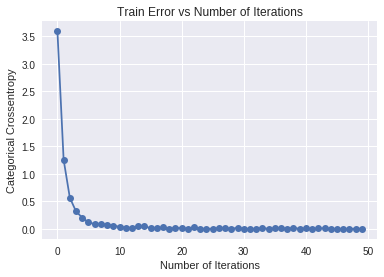

In [17]:
## matplotlib graph to show train error vs number of iterations
%matplotlib inline
plt.plot(history.history['loss'],'o-')
plt.xlabel('Number of Iterations')
plt.ylabel('Categorical Crossentropy')
plt.title('Train Error vs Number of Iterations')
plt.show()

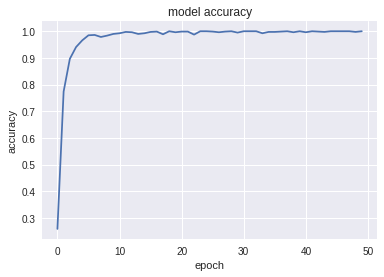

In [18]:
##matplotlib graph to show model accuracy
plt.plot(history.history['acc'])
#plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

In [19]:
## finding predictions on test set
yPred = model.predict(X_test)

In [20]:
from numpy import argmax
yPred.shape
y_pred = [argmax(i) for i in yPred]
print(y_pred[:5])

[55, 4, 14, 50, 69]


In [21]:
y_test_cat = to_categorical(y_test)
y_test_cat.shape

(198, 99)

In [22]:
# finding test accuracy percentage
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
print("Accuracy: {:.4%}".format(acc))

Accuracy: 63.6364%


In [23]:
data = pd.read_csv('test.csv')
index = data.pop('id')

In [24]:
data1= pd.read_csv('train.csv')
parent_data = data1.copy()

In [25]:
test = StandardScaler().fit(test).transform(test)

In [26]:
yPred = model.predict_proba(test)

480/594 [=======================>......] - ETA: 0s

In [27]:
yPred = pd.DataFrame(yPred,index=index,columns=sorted(parent_data.species.unique()))
yPred
print(yPred.shape)

(594, 99)


In [28]:
fp = open('output.csv','w')

In [29]:
fp.write(yPred.to_csv())

1316202